In [78]:
%matplotlib inline

import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
# import yaml
# from scipy import constants

import glob

import uproot

# Kernel = Minuitenv, DataSc



In [93]:
t = uproot.concatenate('build/output*.root:truth',  library="pd", num_workers=10) #filter_name=cols,
t['nPhotonsPerMeV'] = t.nScintPhotons/t.Edep
print(t.shape)

print(f'mean number of photons per MeV deposited: {t.nPhotonsPerMeV.mean():.1f} ± {t.nPhotonsPerMeV.std():.1f} ')

print()
print(t.columns)
t.sort_values(by=['event'], inplace = True)
t.reset_index(drop=True, inplace = True)
# t


(2, 21)
mean number of photons per MeV deposited: 19258.2 ± 12867.1 

Index(['event', 'gen_PDGcode', 'gen_PDGmass', 'gen_charge', 'gen_p', 'gen_px',
       'gen_py', 'gen_pz', 'gen_Ekin', 'nParticles', 'nPrimary', 'nGammas',
       'nOptPhotons', 'nScintPhotons', 'Edep', 'FlightDistance',
       'neutronExit_px', 'neutronExit_py', 'neutronExit_pz', 'neutronExit_E',
       'nPhotonsPerMeV'],
      dtype='object')


In [96]:
cols = ['event', 'gen_PDGcode', 'gen_PDGmass', 'gen_charge', 'gen_p', 'gen_px',
       'gen_py', 'gen_pz', 'gen_Ekin', 'nScintPhotons', 'Edep', 'FlightDistance',
       'neutronExit_px', 'neutronExit_py', 'neutronExit_pz', 'neutronExit_E',
       'nPhotonsPerMeV']
t.loc[:,cols].head()

,event,gen_PDGcode,gen_PDGmass,gen_charge,gen_p,gen_px,gen_py,gen_pz,gen_Ekin,nScintPhotons,Edep,FlightDistance,neutronExit_px,neutronExit_py,neutronExit_pz,neutronExit_E,nPhotonsPerMeV
0,0,2112,939.56536,0,67.896044,67.896044,0.0,0.0,2.45,54724,1.929847,4924.000377,35.232089,16.505769,2.673578,940.374369,28356.658474
1,0,2112,939.56536,0,67.896044,67.896044,0.0,0.0,2.45,14471,1.424336,3970.616072,-38.049729,23.901918,-9.994202,940.692316,10159.823999


In [81]:
# t.query('gen_PDGcode!=2112')
# t.query('nGammas>0 or nOptPhotons>0')

Text(0.5, 0, 'Number of Scintillation Photons')

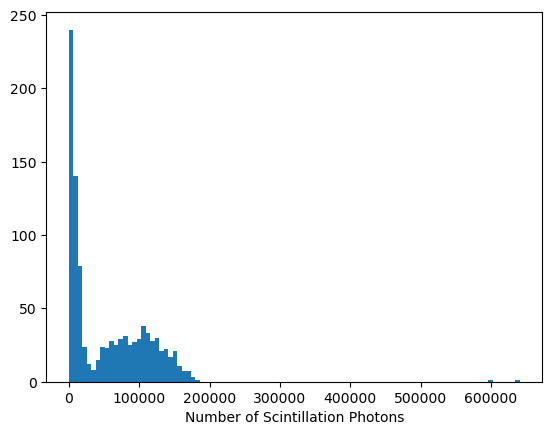

In [82]:
plt.hist(t.nScintPhotons, bins=100);
plt.xlabel("Number of Scintillation Photons")

Text(0.5, 0, 'Energy Deposited    [MeV]')

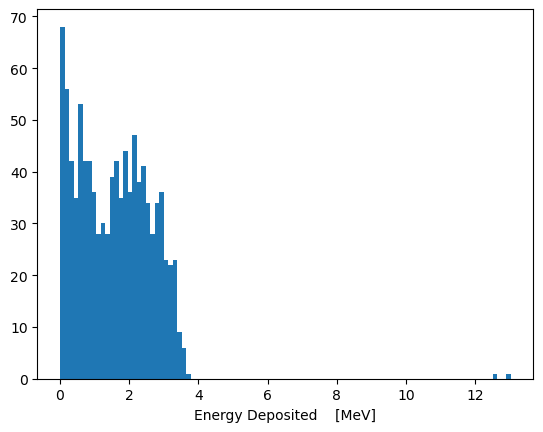

In [83]:
plt.hist(t.Edep, bins=100);
plt.xlabel("Energy Deposited    [MeV]")

Text(0, 0.5, 'Number of Scintillation Photons')

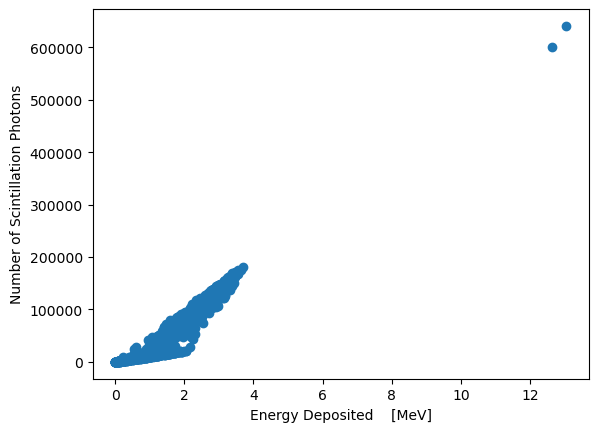

In [84]:
plt.scatter(t.Edep, t.nScintPhotons);
plt.xlabel("Energy Deposited    [MeV]")
plt.ylabel("Number of Scintillation Photons")

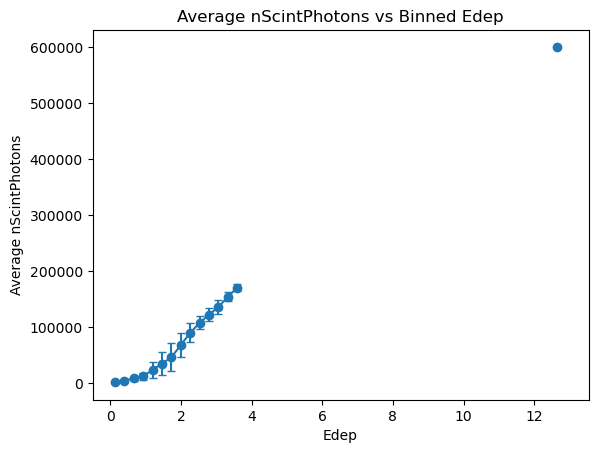

In [85]:
# Define the bins for Edep
n_bins = 50
bins = np.linspace(min(t.Edep), max(t.Edep), n_bins)

# Calculate the mean nScintPhotons for each bin of Edep
digitized = np.digitize(t.Edep, bins)
bin_means = [t.nScintPhotons[digitized == i].mean() for i in range(1, len(bins))]
# # Standard deviation as error
bin_stds  = [t.nScintPhotons[digitized == i].std()  for i in range(1, len(bins))]  
# Poisson error
# bin_stds  = [np.sqrt(digitized[i]) for i in range(1, len(bins))]  

# Plot the binned averages
bin_centers = 0.5 * (bins[1:] + bins[:-1])  # Get the bin centers
# plt.plot(bin_centers, bin_means, marker='o', linestyle='-')
plt.errorbar(bin_centers, bin_means, yerr=bin_stds, fmt='o', linestyle='-', capsize=3, label='Binned Averages')


# Adding labels and title
plt.xlabel("Edep")
plt.ylabel("Average nScintPhotons")
plt.title("Average nScintPhotons vs Binned Edep")

# Display the plot
plt.show()


mean number of photons per MeV deposited: 26358.0 ± 16039.1 


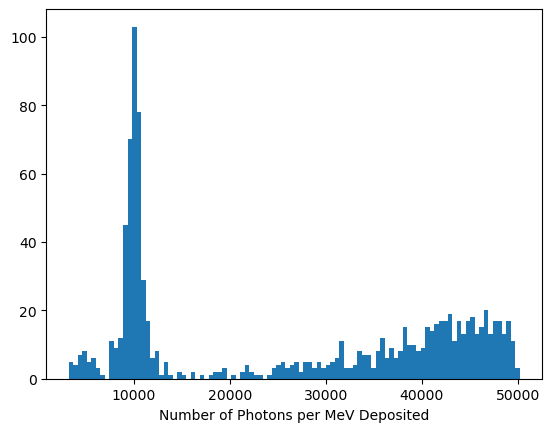

In [86]:
plt.hist(t.nPhotonsPerMeV, bins=100);
plt.xlabel("Number of Photons per MeV Deposited")
print(f'mean number of photons per MeV deposited: {t.nPhotonsPerMeV.mean():.1f} ± {t.nPhotonsPerMeV.std():.1f} ')

In [88]:
# plt.hist(t.query(f'nPhotonsPerMeV>40000').Edep, bins=100);
# plt.xlabel("Energy Deposited    [MeV]")